##### **Analysis by: Trang Tran**

## INTRODUCTION

This is the CODING / DS take home portion for the Data Science position at F.N.B. The objective of this take home portion is to get an understanding of how the candidate operates and thinks within the Data Science space. It is NOT a task that requires endless iteration searching for optimal parameters and scoring and the candidate is encouraged to handle this task from as high level of a view as is desired. The candidate will be scored on the following items:

1. Coding prowess and understanding of object oriented concepts relative to Python and SQL.
2. Data Science concepts and the ability to implement them.
3. Some understanding of statistical concepts and the ability to implement them and test.
4. Interpretability of results and the ability to summarize the results.

It is possible the candidate may have to create a simple Python environment and it is encouraged to use one in Python 3.9 which this task was created. The candidate will return only the iPython notebook (even as HTML or PDF is fine) **by Sunday, 11/5/2023 at 11:59pm**.

### Directive

Lets assume that you are given a project to determine the likelihood of loan default and lets assume that your target variable is binary and it is also imbalanced. The data contains many features are already standardized and some categorical features that may or may not play a role. The loan data is found in the attached zip folder. Assume that the index for the data is the "acctnum" field for the individual who is defaulting. The data has been curated especially for this task and is limited on features in order to prevent excessive time spent in data exploration. X_data.csv contains your X variables/features along with "acctnum". y_data.csv contains the target variable and "acctnum".

- Throughout this task there will be a few "aside" questions that are more to do with programming or SQL rather than the task at hand, please do your best to answer them.
- Like most things in life, this is an "open book" task in that you can use whatever resources you feel necessary to complete it but be aware of blatant code copying and pasting.
- Please use markdown cells to describe your thoughts and why you end up choosing the methods that you do. Remember to try and explain things like the reviewers may know very little about what you are highlighting here but still be concise.

<font color=red size=3>**Please do not spend more than 8 hours on this task!**</font>

**Import all of your functions and the data.**

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats.mstats import winsorize

In [43]:
# importing datasets
X_df = pd.read_csv("X_data.csv")
Y_df = pd.read_csv("y_data.csv")

,acctnum,target
0,310,0
1,854,0
2,677,0
3,956,1
4,489,0
...,...,...
495,638,0
496,84,0
497,659,0
498,499,1


**Examine and describe the distribution of the target variable and relevant features - ie explore the data and tell us about it.**

In [3]:
# Merge X and Y dataframes
df = pd.merge(X_df, Y_df, on="acctnum") 

# Drop the account number column
df.drop(columns='acctnum',inplace=True)

# Inspect the new dataframe
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,gender,education,employment,target
0,0.282987,1.946361,0.664316,0.648262,-0.349247,-1.635531,-1.033898,-0.567599,2.446780,0.660523,0.881658,-0.484618,M,PostGrad,FullTime,0
1,NaN,-0.953207,NaN,-0.718599,-0.939475,-0.842622,0.990444,-0.331903,-0.867023,0.781984,NaN,2.719563,M,None,FullTime,0
2,NaN,-1.594678,0.737307,1.889093,-0.138971,-1.406657,-0.155870,-1.366356,-1.047294,NaN,NaN,NaN,M,UnderGrad,FullTime,0
3,-4.011779,NaN,0.488018,NaN,-2.867880,-0.505970,NaN,-0.548135,-0.656032,-1.427537,1.395853,-2.659984,F,PostGrad,FullTime,1
4,0.682066,NaN,NaN,0.156408,-0.925928,1.563310,-0.021164,-1.229250,2.021062,1.521373,0.686225,NaN,M,UnderGrad,PartTime,0


In [4]:
df.shape

(500, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X0          424 non-null    float64
 1   X1          418 non-null    float64
 2   X2          431 non-null    float64
 3   X3          425 non-null    float64
 4   X4          424 non-null    float64
 5   X5          423 non-null    float64
 6   X6          432 non-null    float64
 7   X7          441 non-null    float64
 8   X8          438 non-null    float64
 9   X9          405 non-null    float64
 10  X10         433 non-null    float64
 11  X11         425 non-null    float64
 12  gender      500 non-null    object 
 13  education   500 non-null    object 
 14  employment  500 non-null    object 
 15  target      500 non-null    int64  
dtypes: float64(12), int64(1), object(3)
memory usage: 66.4+ KB


In [6]:
df.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,target
count,424.000000,418.000000,431.000000,425.000000,424.000000,423.000000,432.000000,441.000000,438.000000,405.000000,433.000000,425.000000,500.000000
mean,-0.341986,-0.033860,0.038748,0.007952,-1.068014,-0.065472,-0.029434,-0.800868,-0.125212,0.885615,-0.006939,1.026734,0.104000
std,1.958415,1.487366,1.004295,0.981507,1.284023,0.992871,1.004354,1.185564,1.519973,1.177958,1.064149,1.385860,0.305566
min,-7.224406,-4.338704,-3.069433,-2.928378,-5.083943,-2.914670,-2.986590,-5.814847,-4.325590,-3.828333,-3.288847,-3.467939,0.000000
25%,-1.592231,-1.165176,-0.702386,-0.644426,-1.928244,-0.712773,-0.716527,-1.587267,-1.139945,0.202125,-0.761588,0.103651,0.000000
50%,-0.435035,-0.152860,0.040045,0.031904,-1.027271,-0.138934,-0.029193,-0.783836,-0.258803,0.893211,0.078215,1.155062,0.000000
75%,0.821562,0.920182,0.780149,0.637545,-0.178968,0.623594,0.667490,-0.090951,0.822748,1.685031,0.784192,1.945633,0.000000
max,5.945238,4.605151,2.832846,2.315710,2.163262,2.750754,3.191720,3.521796,4.602340,4.384903,2.727833,4.806966,1.000000


Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11'],
      dtype='object')


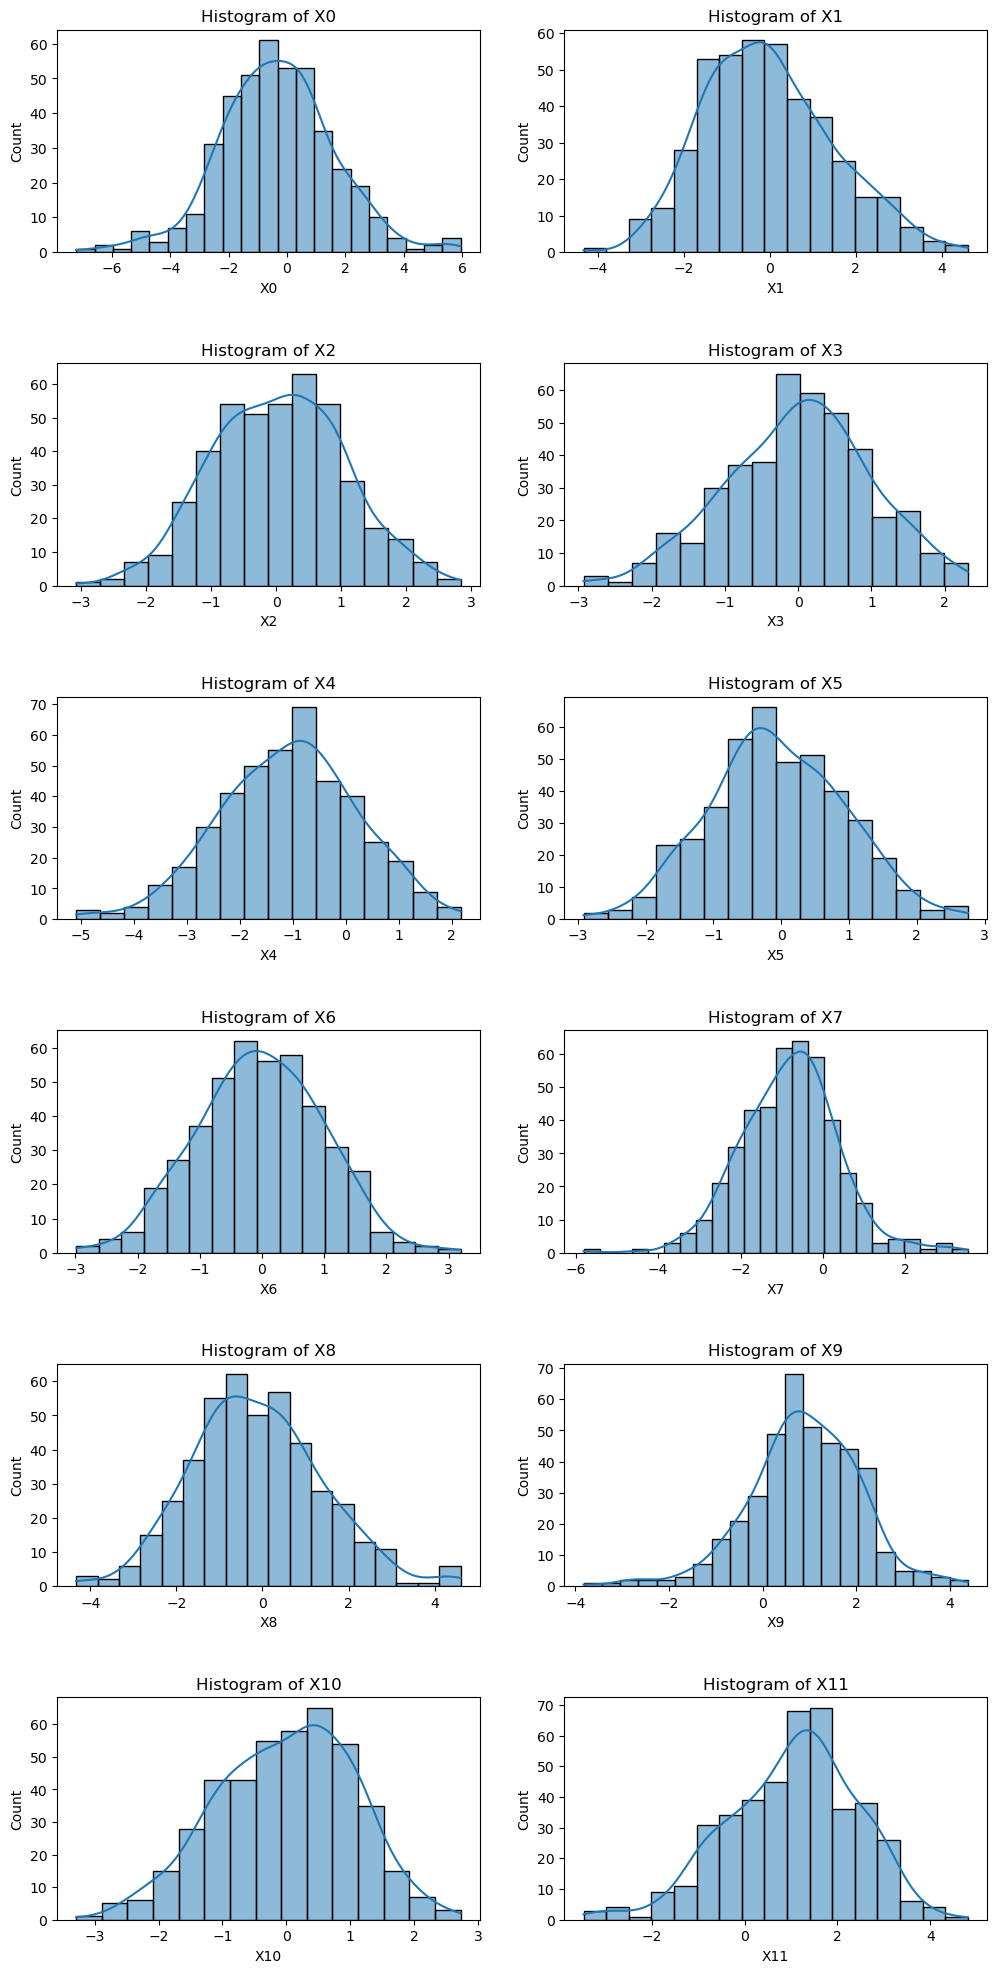

In [7]:
# Create a list of numeric features
numeric_features = df.columns[:-4] # there are 12 numeric features, excluding acctnum 
print(numeric_features)

# Create subplots with adjusted vertical spacing (hspace)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 10))
plt.subplots_adjust(top=2,hspace=0.5)

for i, feature in enumerate(numeric_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.histplot(X_df[feature], kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.grid(False)
    
plt.show()


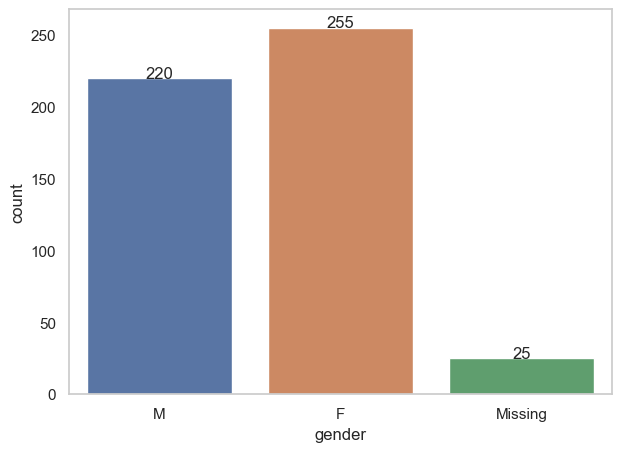

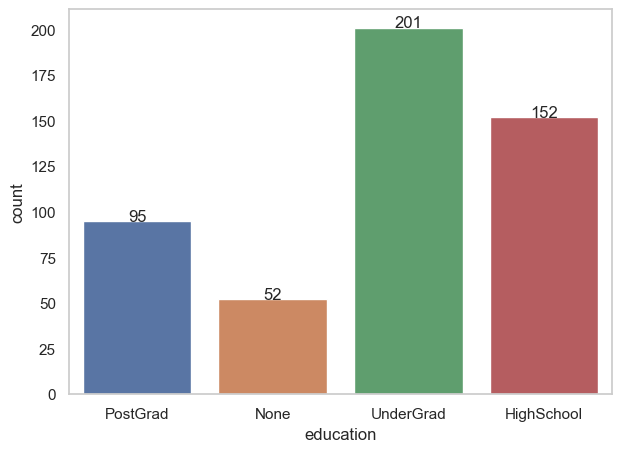

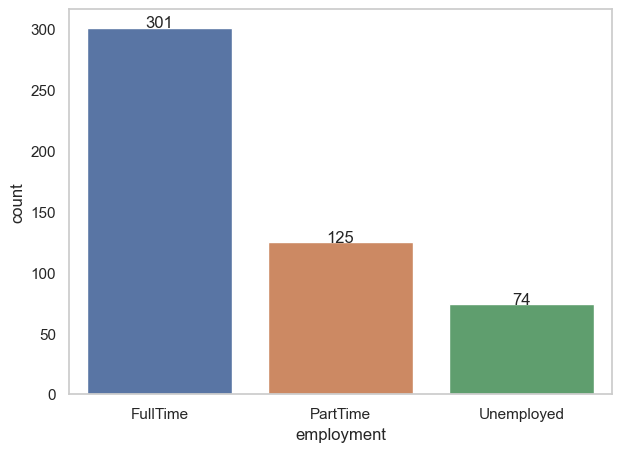

In [8]:
# Distribution of categorical variables

for col in df.columns[-4:-1]:
    plt.figure(figsize=(7, 5))
    sns.set_theme(style="whitegrid")  
    ax = sns.countplot(data=X_df, x=col)

    for bar in ax.patches:
        height= bar.get_height()
        width = bar.get_width()
        ax.annotate(f'{height}', (bar.get_x() + width/2., height), ha='center', va='baseline')
        ax.grid(False)
    plt.show()


In [9]:
# Inspect descriptive summary of the 'target' variable
df[['target']].describe()

,target
count,500.000000
mean,0.104000
std,0.305566
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Frequency:
0    448
1     52
Name: target, dtype: int64
Proportions:
0    0.896
1    0.104
Name: target, dtype: float64


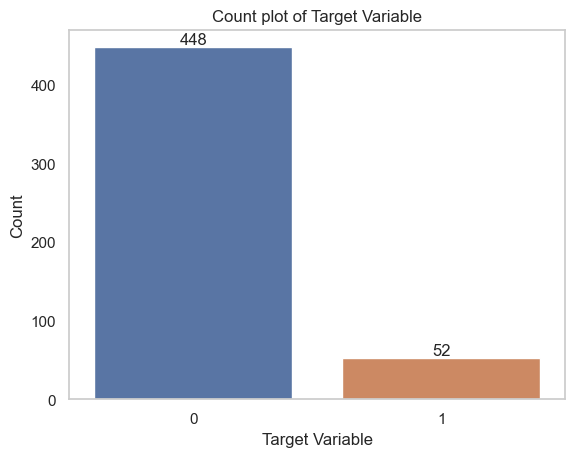

In [10]:
# Calculate and display the proportion of unique target values
frequency = df['target'].value_counts()
print("Frequency:")
print(frequency)

proportions = df['target'].value_counts(normalize=True)
print("Proportions:")
print(proportions)

# Create a count plot to visualize the distribution
fig = sns.countplot(data=df, x='target')
for p in fig.patches:
    fig.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.grid(False)
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Count plot of Target Variable')
plt.show()


### ASIDE #1

**Please create a subset of X that has only X0 values which are split to positive and negative only in two separate features.**

**Feel free to use python to do this, or you could use SQL using the 'pandasql' package. If you want to use SQL, feel free to use the starter code in the next 2 cells.**

In [11]:
# Create a new column for positive values
X_copy = X_df.copy()
X_copy['X0_positive'] = X_copy['X0'].apply(lambda x: x if x > 0 else None)

# Create a new column for negative values
X_copy['X0_negative'] = X_copy['X0'].apply(lambda x: x if x < 0 else None)

**Once again, using pandasql or pandas, join the target data frame and X and group by the target value to find the mean per target value per feature. THIS PORTION WILL NOT NEED TO BE USED IN THE MODEL AND IS JUST TO HIGHLIGHT YOUR SQL OR PANDAS SKILLS.**

In [12]:
# Merge feature and target data frames -- done above 

In [13]:
# Find the mean per target value per feature
for feature in numeric_features:
    mean_feature = df.groupby('target')[feature].mean()
    print(f'Mean {feature} value for each target value is:')
    print(mean_feature.to_string())
    print()

Mean X0 value for each target value is:
target
0   -0.273777
1   -0.931067

Mean X1 value for each target value is:
target
0   -0.012411
1   -0.207323

Mean X2 value for each target value is:
target
0    0.046935
1   -0.031470

Mean X3 value for each target value is:
target
0   -0.012015
1    0.164775

Mean X4 value for each target value is:
target
0   -1.056558
1   -1.175028

Mean X5 value for each target value is:
target
0   -0.050765
1   -0.210278

Mean X6 value for each target value is:
target
0   -0.040115
1    0.056007

Mean X7 value for each target value is:
target
0   -0.898010
1    0.075616

Mean X8 value for each target value is:
target
0   -0.043037
1   -0.825483

Mean X9 value for each target value is:
target
0    1.003159
1   -0.157945

Mean X10 value for each target value is:
target
0    0.007139
1   -0.117262

Mean X11 value for each target value is:
target
0    1.097487
1    0.457699



### DATA CLEANING, MISSING VALUES, AND OUTLIER DETECTION

##### **Duplicates detection**

In [14]:
# Check duplicates
duplicated = df.duplicated().sum()
print(f'Count of duplicated data rows: {duplicated}')
# no duplicated data

Count of duplicated data rows: 0


##### **Missing values detection and imputation**

In [15]:
# Check missing values for numeric features
print("Missing values in each feature:")
print(df.isnull().sum())

Missing values in each feature:
X0            76
X1            82
X2            69
X3            75
X4            76
X5            77
X6            68
X7            59
X8            62
X9            95
X10           67
X11           75
gender         0
education      0
employment     0
target         0
dtype: int64


Based on the distribution graphs above, 11 of the numeric features exhibit a roughly normal distribution, with the exception of X9, which appears to be skewed to the left. It's appropriate to impute missing values in each column with their respective median values.

In [16]:
# Impute missing values with median from each numeric column
for col in numeric_features:
    df = df.fillna(value=df[col].median(),axis='columns')

df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,gender,education,employment,target
0,0.282987,1.946361,0.664316,0.648262,-0.349247,-1.635531,-1.033898,-0.567599,2.446780,0.660523,0.881658,-0.484618,M,PostGrad,FullTime,0
1,-0.435035,-0.953207,-0.435035,-0.718599,-0.939475,-0.842622,0.990444,-0.331903,-0.867023,0.781984,-0.435035,2.719563,M,None,FullTime,0
2,-0.435035,-1.594678,0.737307,1.889093,-0.138971,-1.406657,-0.155870,-1.366356,-1.047294,-0.435035,-0.435035,-0.435035,M,UnderGrad,FullTime,0
3,-4.011779,-0.435035,0.488018,-0.435035,-2.867880,-0.505970,-0.435035,-0.548135,-0.656032,-1.427537,1.395853,-2.659984,F,PostGrad,FullTime,1
4,0.682066,-0.435035,-0.435035,0.156408,-0.925928,1.563310,-0.021164,-1.229250,2.021062,1.521373,0.686225,-0.435035,M,UnderGrad,PartTime,0


In [17]:
df['education'].value_counts()

UnderGrad     201
HighSchool    152
PostGrad       95
None           52
Name: education, dtype: int64

In [18]:
df['employment'].value_counts()

FullTime      301
PartTime      125
Unemployed     74
Name: employment, dtype: int64

In [19]:
df['gender'].value_counts()
# Only the gender category appears to have missing values, represented by 'Missing'. 

F          255
M          220
Missing     25
Name: gender, dtype: int64

To replace 'missing' values in the gender feature, I randomly assign either 'F' or 'M' to them. 

In [20]:
# Count the number of missing values
missing_count = df.gender.value_counts().get('Missing',0)
print(f"Count of missing values in the gender column: {missing_count}")

# Create random gender assignments for the missing values
random_assignments = [random.choice(['M', 'F']) for _ in range(missing_count)]

# Replace the "Missing" values with random assignments
df.loc[df['gender'] == 'Missing', 'gender'] = random_assignments

# Display the updated DataFrame
df['gender'].value_counts()


Count of missing values in the gender column: 25


F    267
M    233
Name: gender, dtype: int64

##### **Outliers detection and imputation**

Based on the bell-shaped distribution graphs of the numeric features, I conclude that they exhibit a normal distribution without any apparent presence of "extreme" outliers. Thus I will use the Z-score method to identify any "normal" outliers.

Among all numeric features, X9 stands out as the most skewed whose shape and pattern may carry significance to the model's performance. To maintain the general distribution of this feature while avoiding the impact of extreme values, I will use the Winsorization method which substitutes extreme outliers with their nearest non-outlier values.

In [21]:
# Identify outliers using Z-score method
threshold = 3
for col in numeric_features:
    mean_val = df[col].mean()
    z_score = (df[col]- mean_val)/(df[col].std())
    outliers = np.abs(z_score) > threshold
    
    # Apply Winsorization to the column to replace outliers
    df[col] = winsorize(df[col], limits=(0.01, 0.01))

##### **Cleaned dataset**

In [22]:
# Display updated df
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,gender,education,employment,target
0,0.282987,1.946361,0.664316,0.648262,-0.349247,-1.635531,-1.033898,-0.567599,2.446780,0.660523,0.881658,-0.484618,M,PostGrad,FullTime,0
1,-0.435035,-0.953207,-0.435035,-0.718599,-0.939475,-0.842622,0.990444,-0.331903,-0.867023,0.781984,-0.435035,2.719563,M,None,FullTime,0
2,-0.435035,-1.594678,0.737307,1.889093,-0.138971,-1.406657,-0.155870,-1.366356,-1.047294,-0.435035,-0.435035,-0.435035,M,UnderGrad,FullTime,0
3,-4.011779,-0.435035,0.488018,-0.435035,-2.867880,-0.505970,-0.435035,-0.548135,-0.656032,-1.427537,1.395853,-2.659984,F,PostGrad,FullTime,1
4,0.682066,-0.435035,-0.435035,0.156408,-0.925928,1.563310,-0.021164,-1.229250,2.021062,1.521373,0.686225,-0.435035,M,UnderGrad,PartTime,0


### ASIDE #2

**Lets assume you are tasked with creating a feature from the current ones. Using Python list comprehension, create a feature that converts the values of X5 to INTEGERS and then squares them only if they are odd.**

In [23]:
df_copy = df.copy()
df_copy['new_feature'] = [int(x)**2 if int(x)%2==1 else int(x) for x in df_copy['X5']]


### BONUS Question:

**Complete the same task above but as a function such that you can provide it to any column.**

In [24]:
def new_col(col):
    for val in df_copy[col].values:
        if int(val)%2==1:
            df_copy['new_X'] = int(val)**2
        else:
            df_copy['new_X'] = int(val)
    return df_copy

### Now that your data is cleaned how would you go about modeling this data?

**Please be specific about why you are choosing the model(s) you are choosing but also do not spend all of your time attempting to optimize the model. A strength of any Data Scientist is knowing when to end the initial iterations of a project.**


##### **Data Preprocessing**

In [25]:
# Import packages for data preprocessing
from sklearn.model_selection import train_test_split

In [26]:
# Encode categorical variables 

# Gender is a nominal variable
gender_mapping = {'M': 0, 'F': 1}
df['gender'] = df['gender'].map(gender_mapping)

# Education is an ordinal variable
education_mapping = {
    'None': 0,
    'HighSchool': 1,
    'UnderGrad': 2,
    'PostGrad': 3,
}
df['education'] = df['education'].map(education_mapping)

# Employment is an ordinal variable
employment_mapping = {
    'Unemployed': 0,
    'PartTime': 1,
    'FullTime': 2
}
df['employment'] = df['employment'].map(employment_mapping)

In [27]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,gender,education,employment,target
0,0.282987,1.946361,0.664316,0.648262,-0.349247,-1.635531,-1.033898,-0.567599,2.446780,0.660523,0.881658,-0.484618,0,3,2,0
1,-0.435035,-0.953207,-0.435035,-0.718599,-0.939475,-0.842622,0.990444,-0.331903,-0.867023,0.781984,-0.435035,2.719563,0,0,2,0
2,-0.435035,-1.594678,0.737307,1.889093,-0.138971,-1.406657,-0.155870,-1.366356,-1.047294,-0.435035,-0.435035,-0.435035,0,2,2,0
3,-4.011779,-0.435035,0.488018,-0.435035,-2.867880,-0.505970,-0.435035,-0.548135,-0.656032,-1.427537,1.395853,-2.659984,1,3,2,1
4,0.682066,-0.435035,-0.435035,0.156408,-0.925928,1.563310,-0.021164,-1.229250,2.021062,1.521373,0.686225,-0.435035,0,2,1,0


Text(0.5, 1.0, 'Correlation matrix')

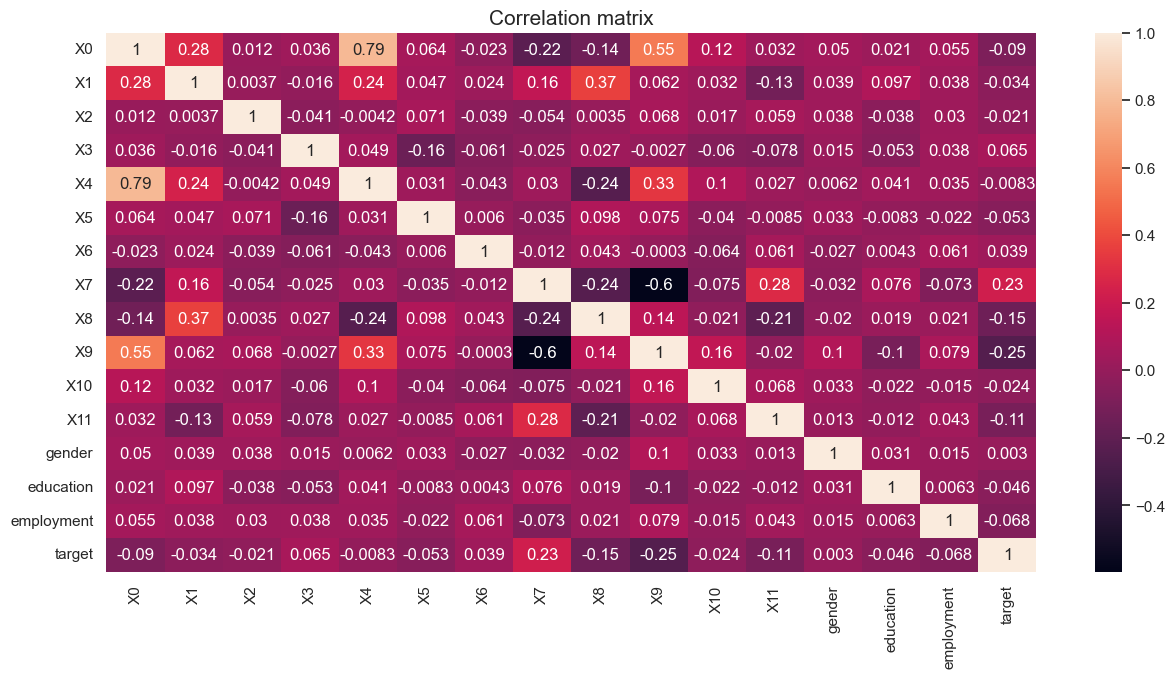

In [28]:
# Check feature correlation 

plt.figure(figsize = (15,7))
heatmap = sns.heatmap(df.corr(), annot = True)
plt.title('Correlation matrix', fontsize=15)

According to the heatmap, there are two pairs of highly correlated features: 

corr(X0, X4) = 0.79
corr(X9, X7) = -0.6


In [29]:
# Check the correlation of 'target' with other variables
df.corr()['target'][:-1]

X0           -0.089844
X1           -0.033633
X2           -0.021465
X3            0.064834
X4           -0.008269
X5           -0.052556
X6            0.039160
X7            0.226039
X8           -0.146395
X9           -0.245401
X10          -0.023652
X11          -0.108475
gender        0.003047
education    -0.045646
employment   -0.067589
Name: target, dtype: float64

In [30]:
# Separate features and target variable
X = df.drop(columns='target')
Y = df['target']

In [31]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1000)

# Check target distribution
y_train.value_counts()

0    355
1     45
Name: target, dtype: int64

##### **Select classification models** 

Two problems with our dataset we need to keep in mind:
1) The target variable is imbalanced. The count ratio is approximately 10:1 (explored in EDA) 
2) Out of 16 features, there are two highly correlated pairs.

Given these problems, I decide to select two classification models: Random Forest and XGBoost. Both of them are decision tree-based ensemble methods which combine multiple decision trees to improve accuracy. Both aren't affected by correlated variables, are robust, work well with imbalanced data, and is less prone to overfitting.  

In [32]:
# Import modeling packages

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, f1_score, recall_score, auc, roc_auc_score, roc_curve

In [33]:
# Run Random Forest model

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# Run XG Boost model

xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)
xg_pred = xg.predict(x_test)

**Regardless of the model that was used, please elaborate on the importance of regularization relative to over fitting.**

Overfitting occurs when a model becomes too complex, fitting both genuine patterns and random noise in the training data. Regularization works by penalizing the model when it assigns excessively large coefficients to features, effectively simplifying the model.

By constraining the magnitude of feature coefficients, regularization prevents the model from overemphasizing individual features, making it more immune to noisy data. This results in a model that focuses on the relevant patterns within the data and makes reliable predictions on new data while avoiding the risks of overfitting.

### Provide relevant Metrics

**Please be specific and elaborate on why you chose the metrics and please describe what the test metrics are telling us.**
**Would it be useful to calibrate this model any further?**

To assess the model, I'll use these four metrics: recall score, precision score, F1 score, and ROC AUC score. These metrics are sensitive to imbalanced data with the exception of the ROC AUC score. They're also applicable to the specific business problem we're aiming to address.

In the context of loan default prediction, the primary objective is to accurately identify accounts at risk of defaulting. The institution seeks to maximize its ability to detect as many defaults as possible among those that occur, which is what the recall score quantifies.

Conversely, the model should avoid wrongly flagging an account as a default risk when it's not, as this could lead to customer dissatisfaction. The precision score comes into play here because it measures the proportion of true defaults among all positive default predictions generated.

The F-1 score measures how well the model's performance balances between precision and recall, i.e. how well the model balances between correctly identifying default and reducing false alarms. 

The ROC AUC score measures how effective the modle is at distinguishing between loans that will default and those that won't.


In [34]:
recall_scores = []
precision_scores = []
f1_scores = []
roc_auc_scores = []

# Write a function to evaluate model performance based on chosen metrics
def evaluate_model(y_pred, model):
    print(f"Performance of the {model} model")
    
    # f1-score of model
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f"F1 Score: {f1*100:.2f}%")
    print("-" * 100)
    print()

    # recall score of model
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)
    print(f"Recall Score: {recall*100:.2f}%")
    print()

    # precision score of model
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)
    print(f"Precision Score: {precision*100:.2f}%")
    print()

    # roc-auc curve of model
    fpr,tpr,threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr,tpr)
    roc_auc_scores.append(roc_auc)
    print(f"ROC AUC Score: {roc_auc*100:.2f}%")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Performance of the RandomForestClassifier() model
F1 Score: 50.00%
----------------------------------------------------------------------------------------------------

Recall Score: 42.86%

Precision Score: 60.00%

ROC AUC Score: 70.35%


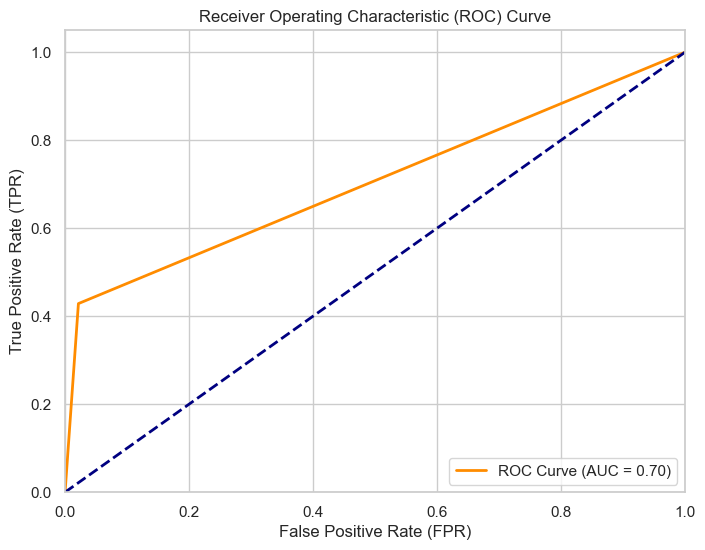

In [35]:
# Evaluate each model performance
rf_perf = evaluate_model(rf_pred, rf)

Performance of the XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) model
F1 Score: 57.14%
----------------------------------------------------------------------------------------------------

Recall Score: 57.14%

Precision Score: 57.14%

ROC AUC Score: 76.96%


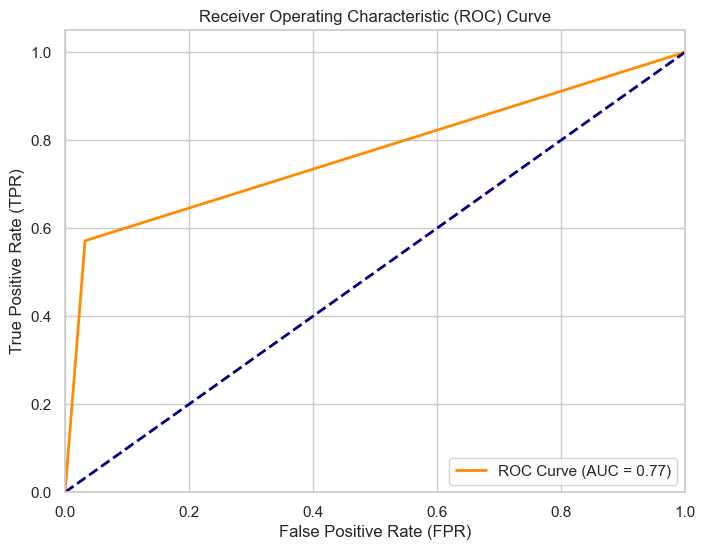

In [36]:
# Evaluate XGBoost model performance

xg_perf = evaluate_model(xg_pred, xg)

### Explainability

**Depending on your model(s) chosen, you will have different ways of describing what is going on. In this portion, assume that you are presenting to a C-Level Suite of Executives, how would you deliver and explain the results of your model? Feel free to use code / visualizations or other Python packages to assist with explainability!**

**Recap**

We're given a dataset of 500 rows with 12 numeric features, 3 categorical features, and a target variable that indicates an account's default status. This target variable is considered imbalanced, with a significant predominance of non-default accounts over default accounts.

The company's objective is to construct a classification model using the given dataset with the goal of accurately classifies an account as either will default on its loan or not. It is crucial that the chosen models show sensitivity to the imbalanced data and avoid introducing bias toward the majority class. Thus, I opted for the Random Forest Classification and XGBoost Classification models to address these requirements. 

After constructing the loan default classification models, to evaluate their reliability and effectiveness, I chose 3 metrics: recall score, precision score, F1 score, AUC ROC score. These metrics have been explained above.

**Metric-based evaluation**

The Random Forest model correctly captures about 43% of all actual loan defaults (recall score). It also implies that the model misses 58% of the loan defaults. This is a very concerning score in the context of a loan default model. It suggests that over half of the loan defaults go undetected, potentially resulting in tremendous financial loss for the company. 

A precision score of 50% means that, among the instances that the model predicts as loan defaults, half them are actual loan defaults. This implies that the other half instances predicted as loan defaults are false positives, i.e they're not actual loan defaults. This is also a concerning number, since half of all accounts are flagged as default threats incorrectly, potentially causing client dissatisfaction. 

A 46% F-1 score suggests that the model has a moderate balance between precision and recall in identifying loan defaults. The AUC-ROC score of almost 70% indicates that the model is acceptable at distinguishing between loans that will default and those that won't.

The XGBoost model reports a 57% score in all three metrics: recall, precision and F1. This is highly unusual and would warrant further investigations. Nonetheless, it outperforms the Random Forest model. If no anomalies are found, it'd suggest that the XGBoost model is a better predictor of loan default than the Random Forest model. Its AUC ROC score is 77%, indicating a quite good ability to separate good accounts from default-likely accounts. 

In [37]:
metric_table = pd.DataFrame({
    'Model':['Random Forest','XGBoost'], 
    'Recall Score':recall_scores, 
    'Precision Score':precision_scores, 
    'F1 Score':f1_scores, 
    'AUC ROC Score':roc_auc_scores})

metric_table


,Model,Recall Score,Precision Score,F1 Score,AUC ROC Score
0,Random Forest,0.428571,0.600000,0.500000,0.703533
1,XGBoost,0.571429,0.571429,0.571429,0.769585


##### **Feature Importance**

Feature importance plays a significant role in model assessment and interpretability. The feature importance chart provides insights into the relevance and influence of various features within a model. Essentially, it determines which features has the greatest impact in predicting the model's outcome.

When comparing the Random Forest and XGBoost models, there are both similarities and differences in how they assign importance to different features. Notably, in both models, 'X9' rank first as the most critical feature in determining loan default, accounting for about 16% in both models. 'X0' and 'X8' rank in top 5 in both models. 'Gender' holds the least significance in both models at under 5%. This implies that a borrower's gender has minimal impact on predicting loan default.

Interestingly, the two models diverge in terms of the treatment of categorical variables. In the Random Forest model, 'education' ranks 4th at approximately 8%, while it's placed in the bottom 3 in the XGBoost model. Beyond these top four features, the Random Forest and XGBoost models differ in their ranking of the remaining features.

<Figure size 800x500 with 0 Axes>

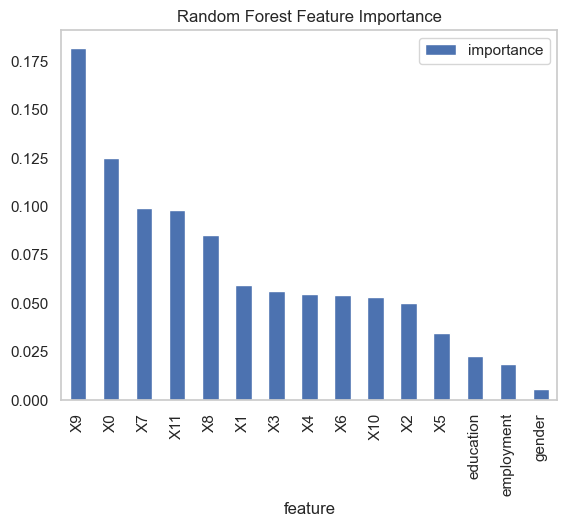

<Figure size 800x500 with 0 Axes>

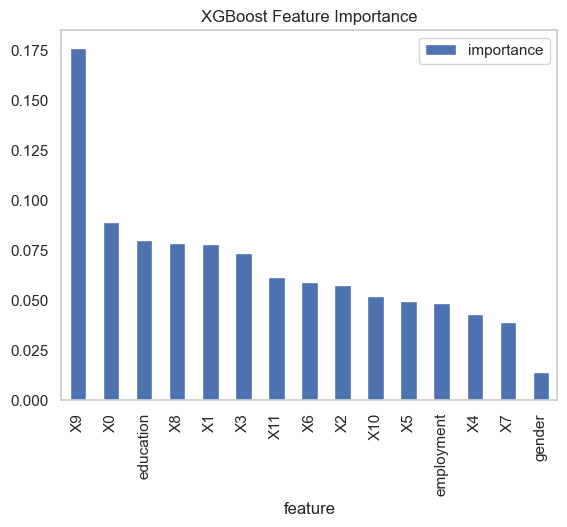

In [38]:
def plot_feature_importance(model, feature_cols, title):
    importance = pd.DataFrame({"feature": feature_cols, "importance": model.feature_importances_})
    importance = importance.sort_values(by="importance", ascending=False)

    plt.figure(figsize=(8, 5))
    ax = importance.plot(x="feature", y="importance", kind="bar")
    ax.grid(False)
    plt.title(title)
    plt.show()

# Usage for Random Forest
plot_feature_importance(rf, X.columns, "Random Forest Feature Importance")

# Usage for XGBoost
plot_feature_importance(xg, X.columns, "XGBoost Feature Importance")


**Are these model good to use?**

For now, no. As stated, the recall score and precision score for both models are too low to be employed with confidence. Even though XGBoost model performs better than the Random Forest one, its scores are still way below acceptance rate. For a loan default predictor, in my opinion the recall score should be at least 95%, and the precision score at least 90%. Both AUC ROC scores, while acceptable, are far from ideal. A model's AUC ROC score should be in the 80-90% range to be considered good and over 90% to be outstanding. 

I suggest that the company's data scientists team continue to develop and refine this model further to achieve a desirable outcome. 